In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)
# df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

,과정명,학원명,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS,과정
0,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,42,1161380,20,93.8,36.0,인천,부평구,03_금융보험,보험사무원
1,보험총무사무원,부천여성인력개발센터,40,1106080,20,64.3,34.0,경기,부천시,03_금융보험,보험사무원
2,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,31.0,인천,부평구,03_금융보험,보험사무원
3,보험총무사무원양성,은평여성인력개발센터,40,1106080,18,54.3,36.0,서울,은평구,03_금융보험,보험사무원
4,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,35.0,인천,부평구,03_금융보험,보험사무원
...,...,...,...,...,...,...,...,...,...,...,...
15985,애견미용사심화과정,동물농장애견미용학원,20,802440,12,50.0,NaN,부산,동래구,24_농림어업,애견미용사
15986,[탑강] 유기농업기능사 필기,한국이러닝협회,28,152770,500,20.0,NaN,서울,구로구,24_농림어업,유기농업기능사
15987,[탑강] 유기농업산업기사 필기,한국이러닝협회,49,186500,500,20.0,NaN,서울,구로구,24_농림어업,유기농업산업기사
15988,애견미용사 취업과정,프로펫애완동물관리학원,113,2697530,15,46.9,NaN,강원,원주시,24_농림어업,애견미용사


In [63]:
grouped = df.groupby(['과정'])

period30_filter = grouped.filter(lambda x: x.기간.max() <= 30)
period90_filter = grouped.filter(lambda x: x.기간.max() <= 90 and x.기간.min() > 30)
period180_filter = grouped.filter(lambda x: x.기간.max() <= 180 and x.기간.min() > 90)
period365_filter = grouped.filter(lambda x: x.기간.min() > 180)
# display(period365_filter.head())



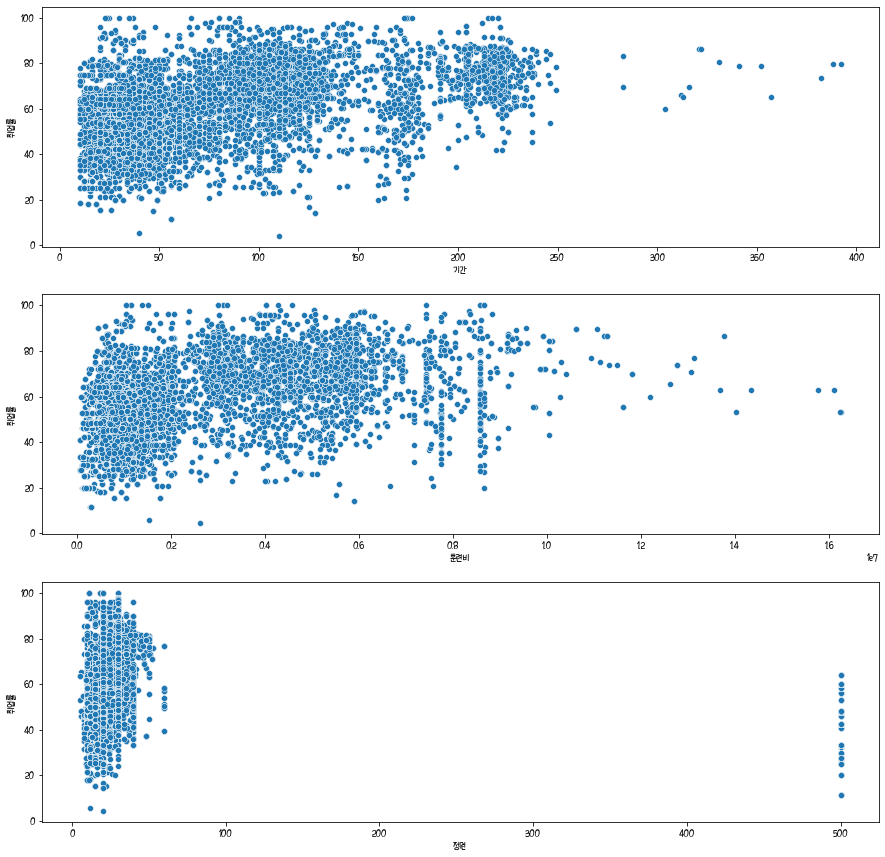

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

sns.scatterplot(x='기간', y='취업률', data=df, ax=ax1)
sns.scatterplot(x='훈련비', y='취업률', data=df, ax=ax2)
sns.scatterplot(x='정원', y='취업률', data=df, ax=ax3)

plt.show()

## 1. NCS별 기간과 취업률

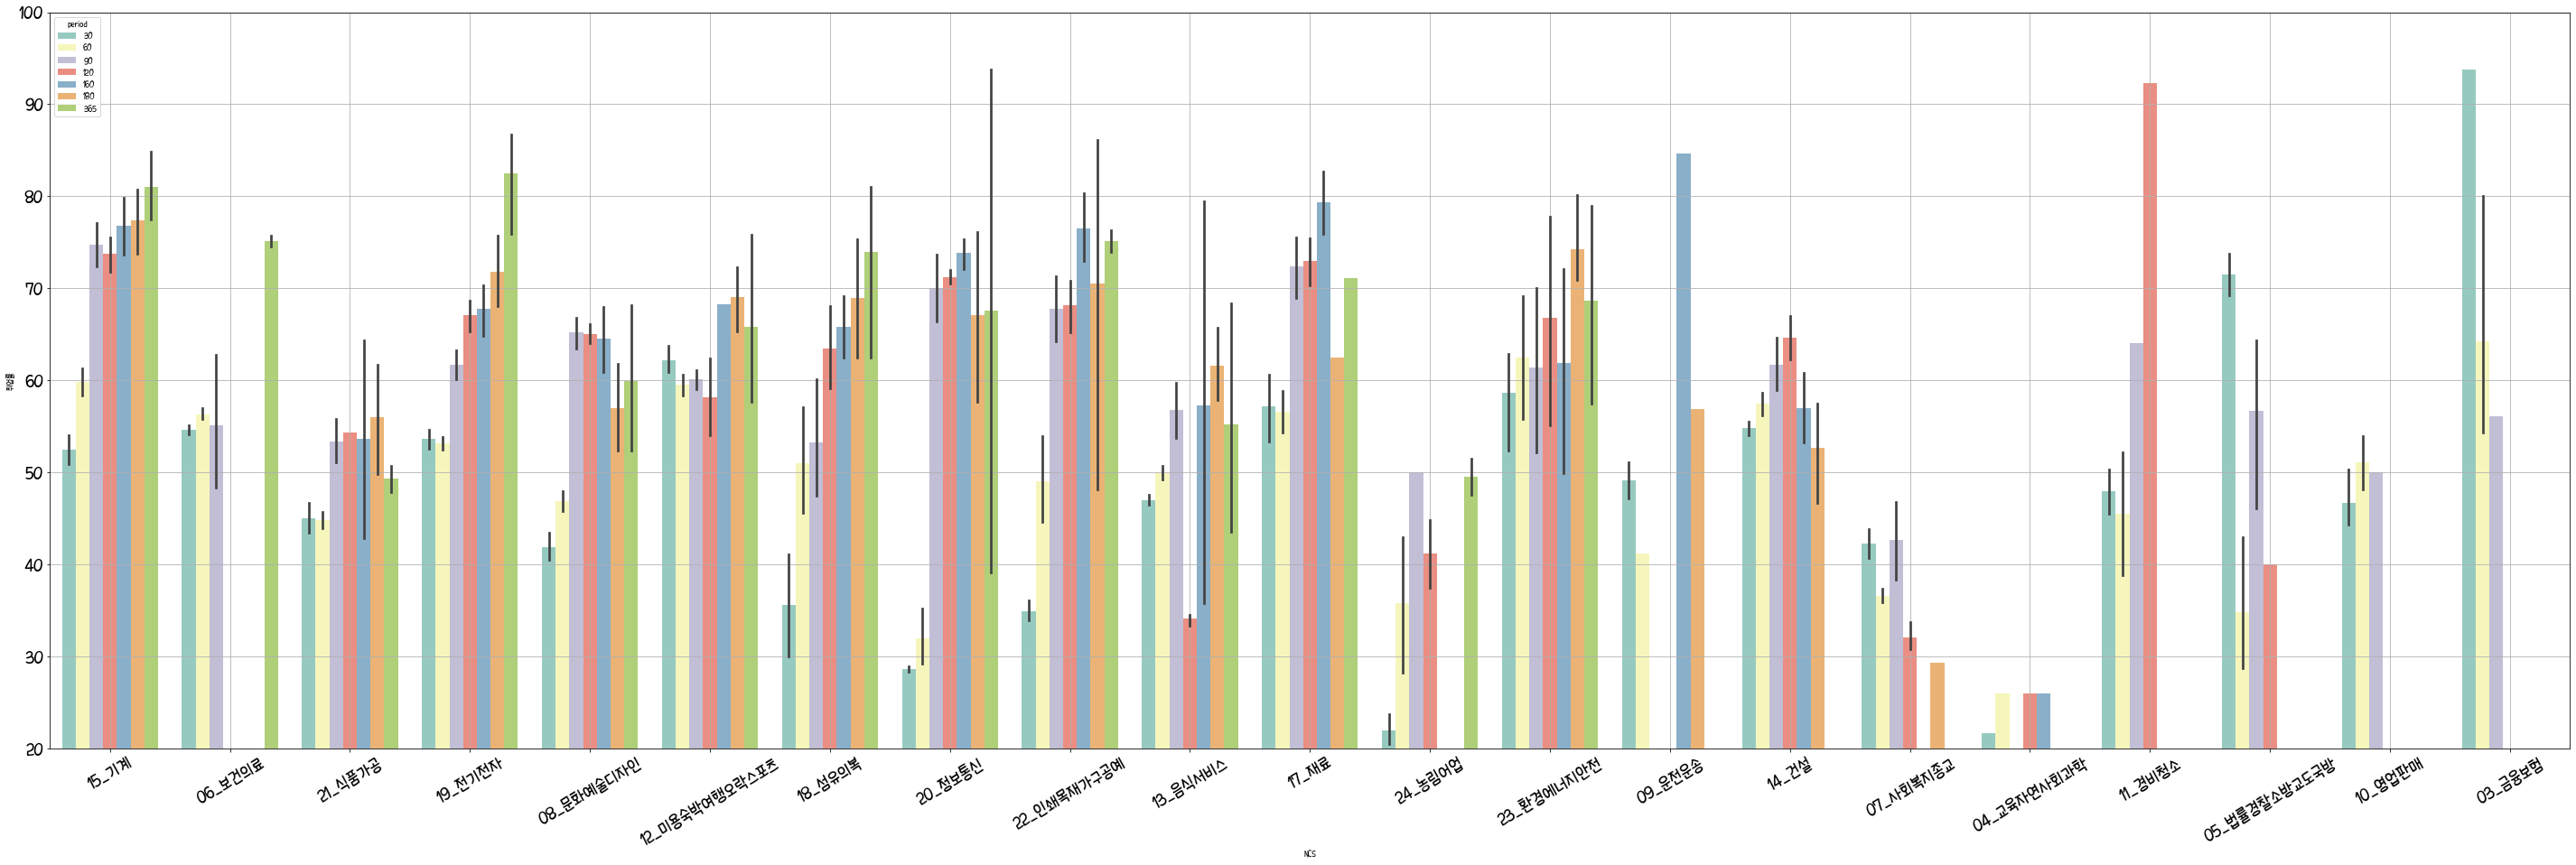

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_1 = df.copy()
df_p = df_1['기간']
periodlist = []
for i in range(len(df_p)):
    if df_p[i] <= 30 :
        p = 30
    elif 30 < df_p[i] <= 60 :
        p = 60
    elif 30 < df_p[i] <= 90 :
        p = 90
    elif 90 < df_p[i] <= 120 :
        p = 120
    elif 120 < df_p[i] <= 160 :
        p = 160
    elif 90 < df_p[i] <= 180 :
        p = 180
    else :
        p = 365
    
    periodlist.append(p)
df_1['period'] = periodlist
df_1.sort_values(by=['period'], ascending=False, inplace=True)
# 구역설정
fig = plt.figure(figsize=(50,15))
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
sns.barplot(x='NCS', y='취업률', hue='period' , palette='Set3', data=df_1, ax=ax1)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.grid(True)
plt.ylim(20, 100)
plt.show()

,취업률
기간,
28,93.8
42,93.8
40,56.8


ValueError: Could not interpret input '과정'

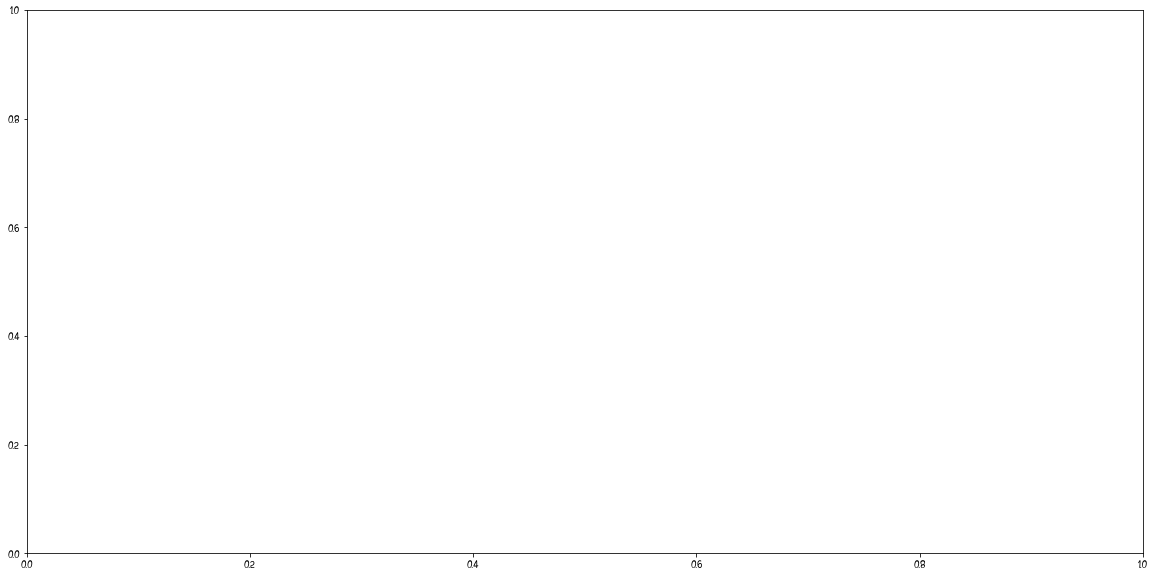

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_period = df.loc[:,['NCS','취업률','과정','기간']]
grouped = df_period.groupby(['과정','기간'])
df_period = grouped.mean()
df_period = df_period.loc['보험사무원'].sort_values(by=['취업률'], ascending=False)
# df_period.reset_index(level=['과정'])
display(df_period)

# 구역 설정
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.barplot(x=df_period.index, y="취업률", hue='과정', data=df_period, palette="rocket", ax=ax1)
plt.xticks(size=14, rotation=70)
plt.yticks(size=14)
plt.grid(True)
plt.ylim(20, 100)

# 텍스트 설정

# 출력 
plt.show()

## 2. NCS별 훈련비와 취업률

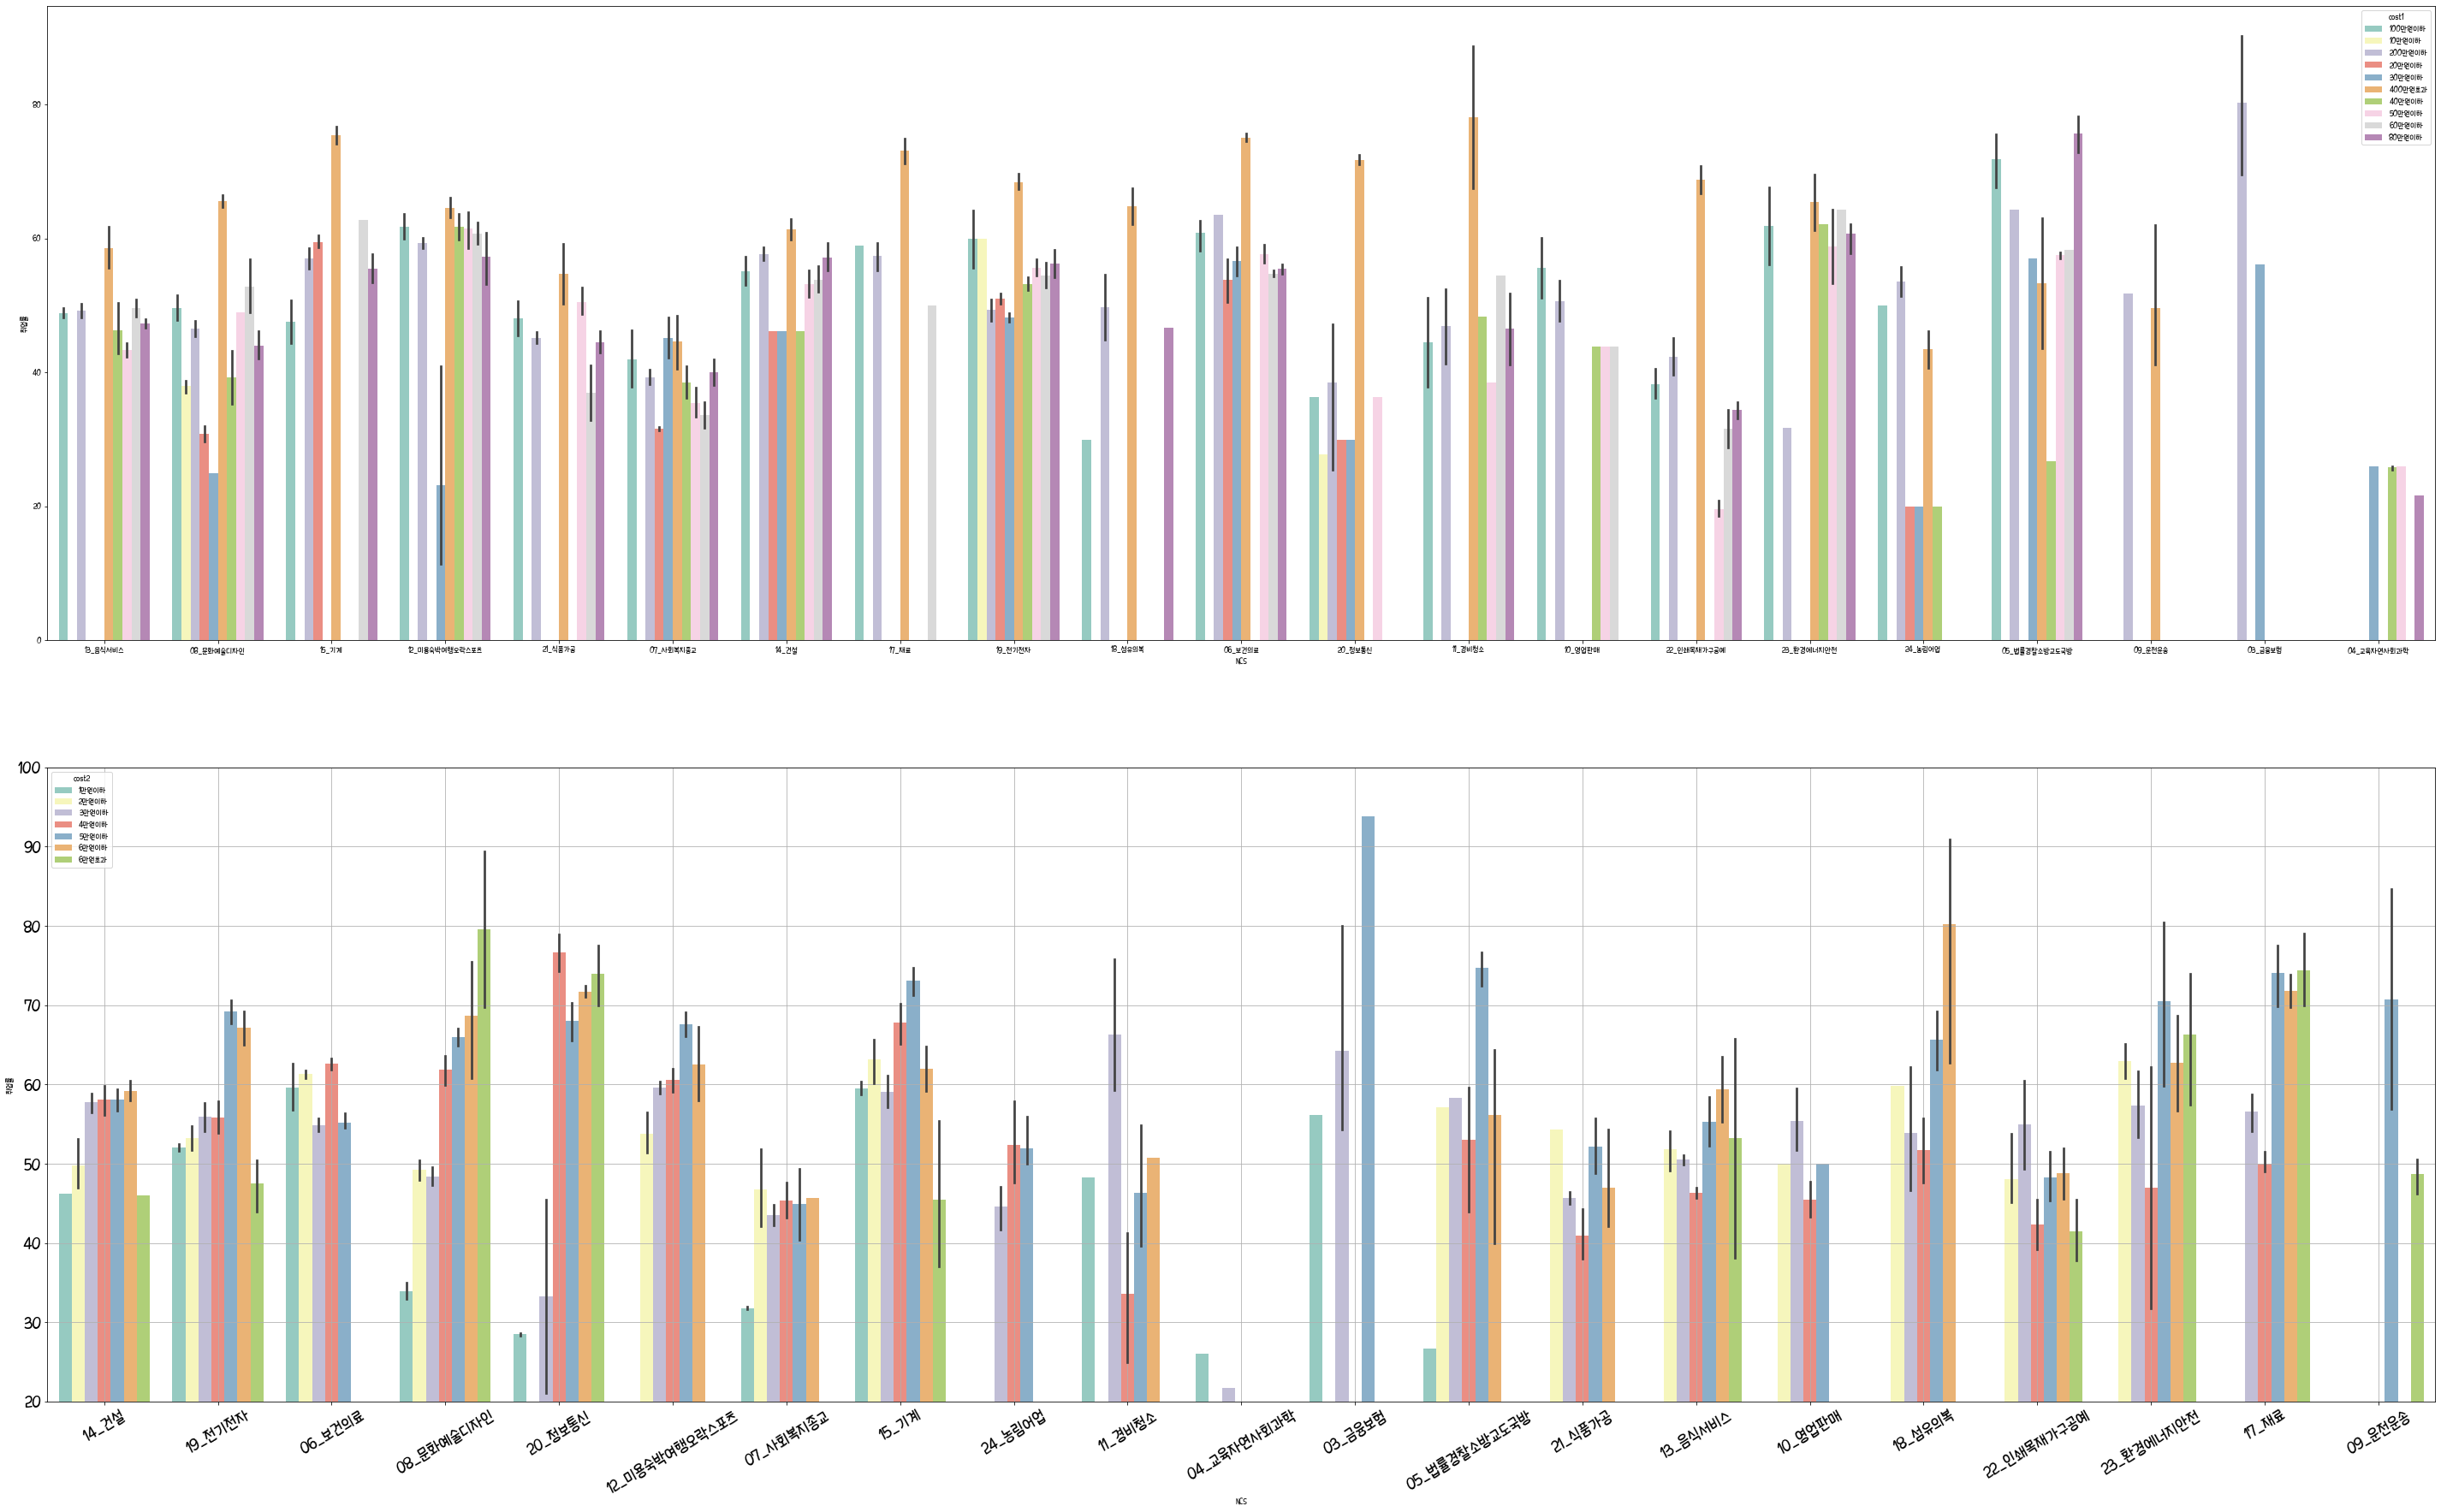

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_2 = df.copy()

df_2['cost1'] = df_2['훈련비']
df_c = df_2['cost1']
cost_list1 = []
for i in range(len(df_c)):
    if df_c[i] <= 100000 :
        p = '10만원이하'
    elif 100000 < df_c[i] <= 200000 :
        p = '20만원이하'
    elif 200000 < df_c[i] <= 300000 :
        p = '30만원이하'
    elif 300000 < df_c[i] <= 400000 :
        p = '40만원이하'
    elif 400000 < df_c[i] <= 500000 :
        p = '50만원이하'
    elif 500000 < df_c[i] <= 600000 :
        p = '60만원이하'
    elif 600000 < df_c[i] <= 800000 :
        p = '80만원이하'
    elif 800000 < df_c[i] <= 1000000 :
        p = '100만원이하'
    elif 100000 < df_c[i] <= 2000000 :
        p = '200만원이하'
    elif 20000000 < df_c[i] <= 4000000 :
        p = '400만원이하'        
    else:
        p = '400만원초과'
    
    cost_list1.append(p)
df_2['cost1'] = cost_list1
df2 = df_2.sort_values(by=['cost1'])

df_2['cost2'] = round(df_2['훈련비']/ df_2['기간'], 0).astype(int)
df_c = df_2['cost2']
cost_list = []
for i in range(len(df_c)):
    if df_c[i] <= 10000 :
        p = '1만원이하'
    elif 10000 < df_c[i] <= 20000 :
        p = '2만원이하'
    elif 20000 < df_c[i] <= 30000 :
        p = '3만원이하'
    elif 30000 < df_c[i] <= 40000 :
        p = '4만원이하'
    elif 40000 < df_c[i] <= 50000 :
        p = '5만원이하'
    elif 50000 < df_c[i] <= 60000 :
        p = '6만원이하'
    else :
        p = '6만원초과'
    
    cost_list.append(p)
df_2['cost2'] = cost_list
df3 = df_2.sort_values(by=['cost2'])

# 구역설정
fig = plt.figure(figsize=(50,30))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 그래프 그리기
# sns.regplot(x='NCS', y='cost1', data=df_2, ax=ax1)
sns.barplot(x='NCS', y='취업률', hue='cost1' , palette='Set3', data=df2, ax=ax1)
sns.barplot(x='NCS', y='취업률', hue='cost2' , palette='Set3', data=df3, ax=ax2)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.grid(True)
plt.ylim(20, 100)

plt.show()

## NCS별 정원과 취업률

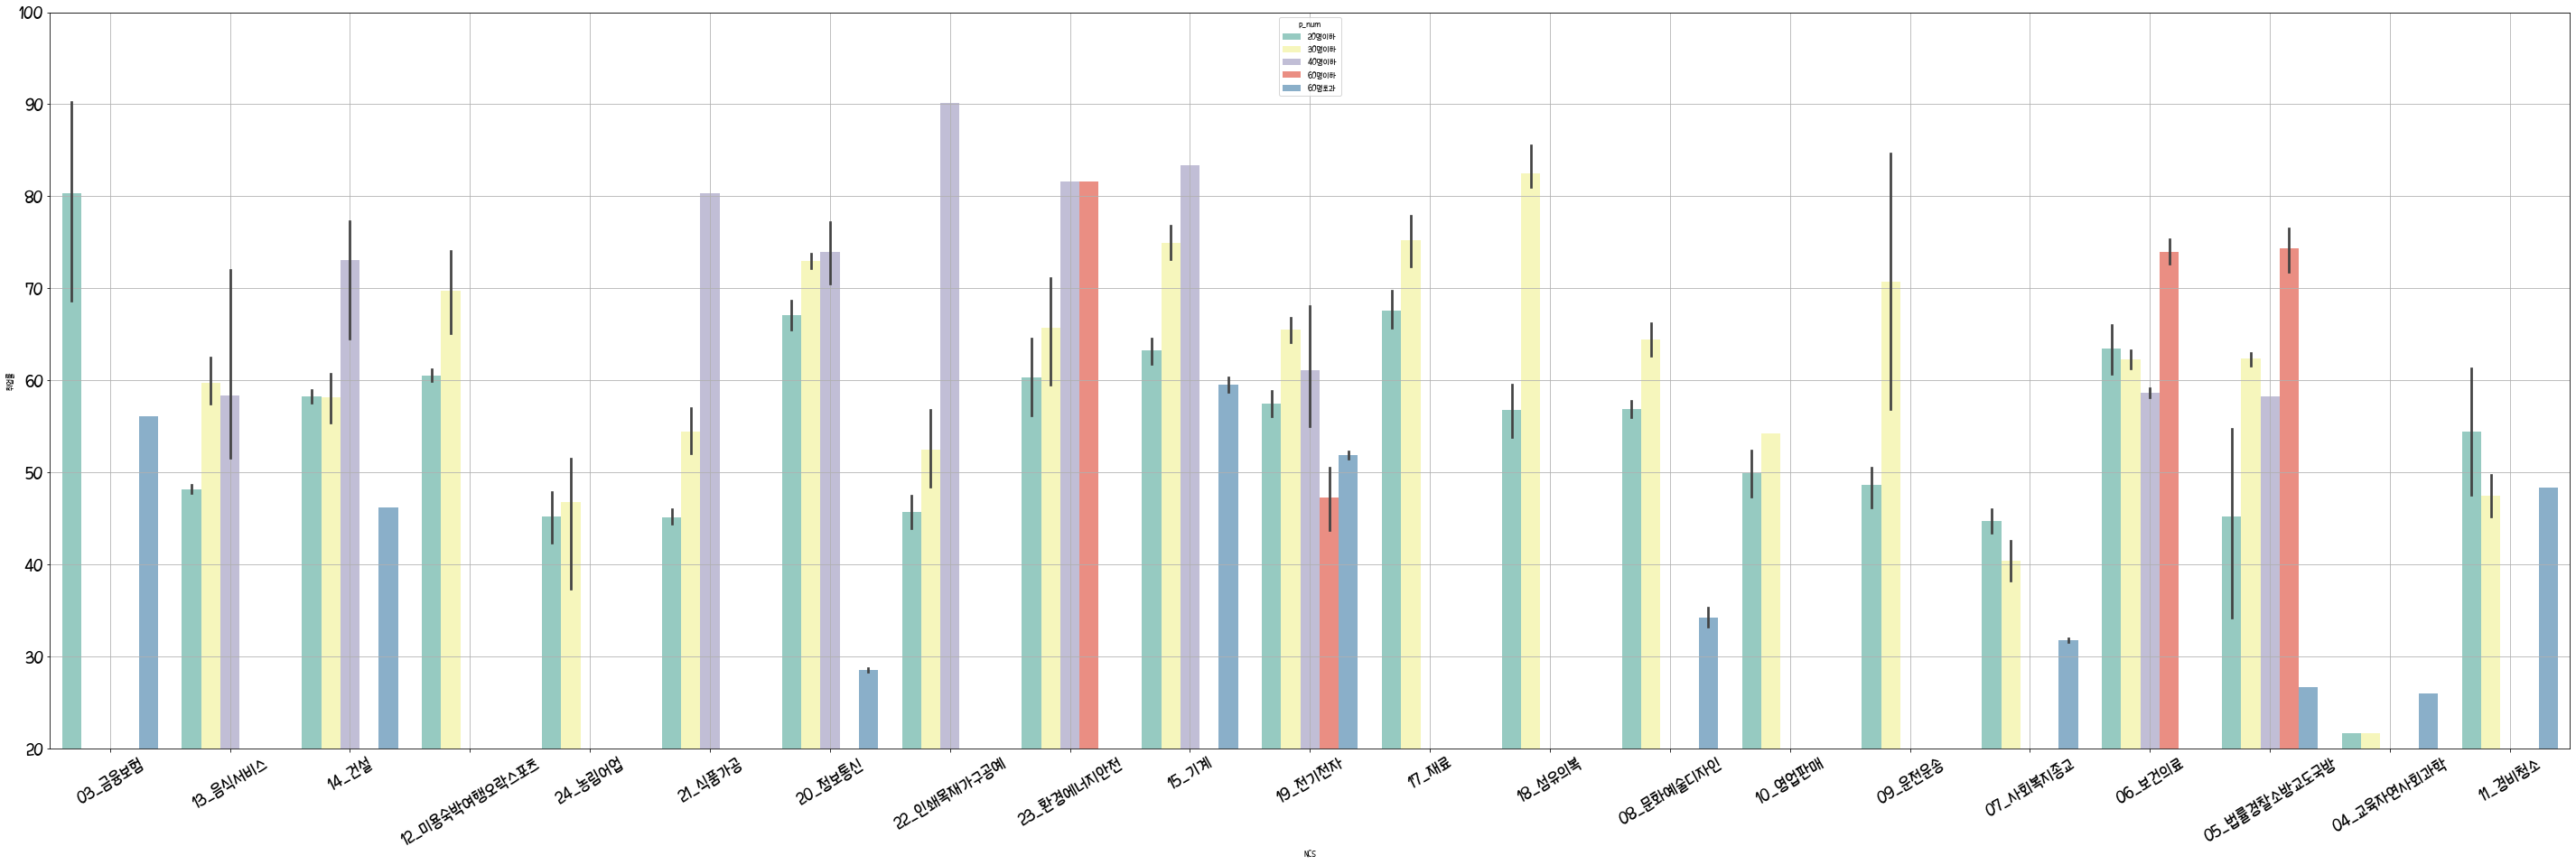

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
df_3 = df.copy()
df_p = df_3['정원']
personnellist = []
for i in range(len(df_p)):
    if df_p[i] <= 20 :
        p = '20명이하'
    elif 20 < df_p[i] <= 30 :
        p = '30명이하'
    elif 30 < df_p[i] <= 40 :
        p = '40명이하'
    elif 40 < df_p[i] <= 60 :
        p = '60명이하'
    else :
        p = '60명초과'
    
    personnellist.append(p)
df_3['p_num'] = personnellist
df_3.sort_values(by=['p_num'], inplace=True)
# 구역설정
fig = plt.figure(figsize=(50,15))
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
sns.barplot(x='NCS', y='취업률', hue='p_num' , palette='Set3', data=df_3, ax=ax1)
plt.xticks(size=20, rotation=30)
plt.yticks(size=20)
plt.grid(True)
plt.ylim(20, 100)
plt.show()